In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np

from tigro.io.load import load_phmap
from tigro.core.process import filter_phmap
from tigro.utils.util import get_threshold
from tigro.core.process import med_phmap
from tigro.core.fit import fit_ellipse
from tigro.core.process import register_phmap
from tigro.utils.util import get_uref
from tigro.plots.plot import plot_sag
from tigro.core.fit import fit_zernike
from tigro.io.save import to_pickle
from tigro.plots.plot import plot_allpolys
from tigro.plots.plot import plot_polys

In [3]:
datapath = "/export/NAS/ariel/data/ariel_user/TA/M1-SM/formatted_data"
# sequence_ids = np.arange(268, 272 + 1, dtype=int)
sequence_ids = np.hstack((np.arange(237, 248 + 1), (np.arange(261, 284 + 1))))
# filter_type = np.ma.median
filter_type = np.ma.mean
semi_major, semi_minor = 451, 310

In [4]:
phmap = load_phmap(datapath, sequence_ids)

Loading files ...


In [5]:
phmap = filter_phmap(phmap)

Filter sequence : 237  238  239  240  241  242  243r 244r 245r 246r 247r 248r 261  262  263  264  265  266  267r 268r 269r 270r 271r 272r 273r 274r 275r 276r 277r 278r 279  280  281  282  283  284  

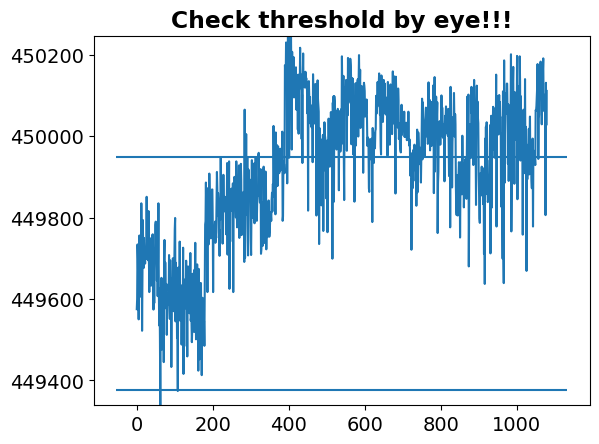

In [6]:
threshold = get_threshold(phmap)

In [7]:
phmap = med_phmap(phmap, threshold, filter_type)

In [8]:
phmap = fit_ellipse(phmap)

   237 (498.3 481.2) 456.8 313.3 -0.8 
   238 (498.3 481.2) 456.8 313.2 -0.8 
   239 (498.3 481.1) 456.7 313.2 -0.8 
   240 (498.2 481.3) 456.7 313.2 -0.8 
   241 (498.3 481.3) 456.7 313.3 -0.8 
   242 (498.2 481.3) 456.7 313.3 -0.8 
   243 (525.7 530.1) 456.8 313.3 -0.9 
   244 (525.8 530.2) 456.8 313.5 -0.9 
   245 (525.6 530.2) 456.6 313.5 -0.9 
   246 (525.6 530.2) 456.6 313.5 -0.9 
   247 (525.9 530.2) 456.7 313.5 -0.9 
   248 (525.6 530.2) 456.6 313.6 -0.9 
   261 (500.3 500.6) 456.9 313.3 -0.0 
   262 (500.2 500.5) 456.9 313.5 -0.0 
   263 (500.2 500.5) 457.0 313.5 -0.0 
   264 (500.2 500.5) 457.0 313.4 -0.0 
   265 (499.9 500.2) 456.9 313.3 -0.1 
   266 (499.8 500.0) 457.0 313.3 -0.0 
   267 (527.6 533.6) 456.8 313.5 -0.3 
   268 (527.6 533.6) 456.8 313.5 -0.3 
   269 (527.5 533.4) 456.8 313.5 -0.3 
   270 (527.6 533.6) 456.8 313.6 -0.3 
   271 (527.7 533.5) 456.9 313.5 -0.3 
   272 (527.9 533.6) 456.8 313.6 -0.3 
   273 (527.7 533.6) 456.6 313.7 -0.3 
   274 (528.0 533.5) 456.

In [9]:
phmap = register_phmap(phmap)

|| seq:237 | dx: 13.69 dy: 30.79  ||
|| seq:238 | dx: 13.70 dy: 30.84  ||
|| seq:239 | dx: 13.71 dy: 30.86  ||
|| seq:240 | dx: 13.82 dy: 30.73  ||
|| seq:241 | dx: 13.66 dy: 30.69  ||
|| seq:242 | dx: 13.81 dy: 30.71  ||
|| seq:243 | dx:-13.74 dy:-18.09  ||
|| seq:244 | dx:-13.82 dy:-18.18  ||
|| seq:245 | dx:-13.64 dy:-18.20  ||
|| seq:246 | dx:-13.63 dy:-18.23  ||
|| seq:247 | dx:-13.87 dy:-18.16  ||
|| seq:248 | dx:-13.60 dy:-18.24  ||
|| seq:261 | dx: 11.73 dy: 11.41  ||
|| seq:262 | dx: 11.78 dy: 11.53  ||
|| seq:263 | dx: 11.81 dy: 11.51  ||
|| seq:264 | dx: 11.78 dy: 11.50  ||
|| seq:265 | dx: 12.06 dy: 11.80  ||
|| seq:266 | dx: 12.21 dy: 11.96  ||
|| seq:267 | dx:-15.61 dy:-21.56  ||
|| seq:268 | dx:-15.55 dy:-21.58  ||
|| seq:269 | dx:-15.55 dy:-21.44  ||
|| seq:270 | dx:-15.64 dy:-21.61  ||
|| seq:271 | dx:-15.67 dy:-21.49  ||
|| seq:272 | dx:-15.90 dy:-21.60  ||
|| seq:273 | dx:-15.74 dy:-21.65  ||
|| seq:274 | dx:-15.99 dy:-21.52  ||
|| seq:275 | dx:-15.72 dy:-21.54  ||
|

In [10]:
uref = get_uref(phmap, semi_major=semi_major, semi_minor=semi_minor)

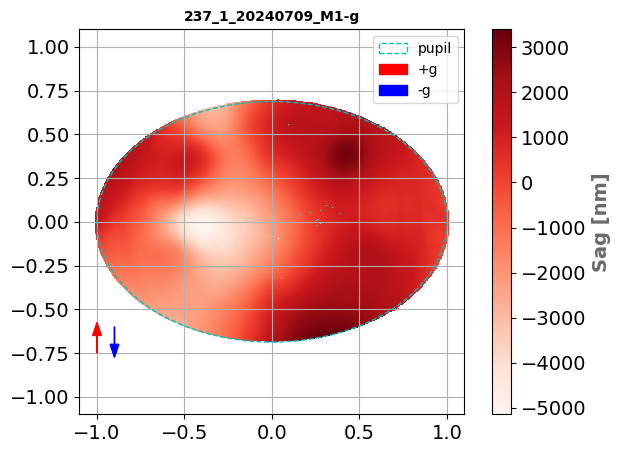

In [11]:
imkey = list(phmap.keys())[0]
plot_sag(phmap, uref, imkey, imsubkey="RegMap")

In [12]:
NZernike = 15

phmap = fit_zernike(phmap, uref, NZernike=NZernike)

Calculating 15 Polys... 

done
fitting sequence n.: 237 238 239 240 241 242 243 244 245 246 247 248 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284

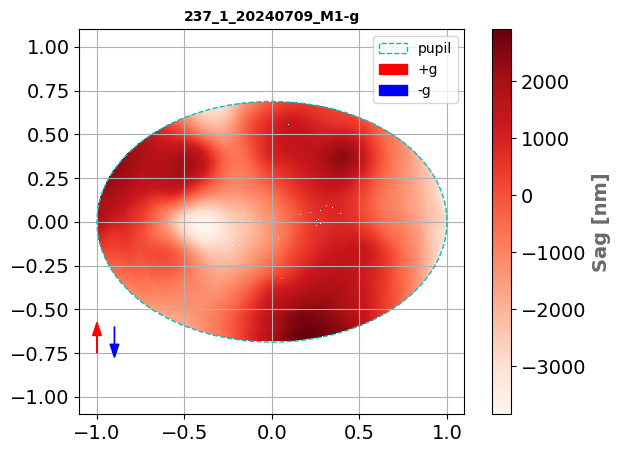

In [13]:
imkey = list(phmap.keys())[0]
plot_sag(phmap, uref, imkey, imsubkey="RegMap-PTTF")

In [14]:
outpath = "/home/ariel/andrea.bocchieri/DATA/Optics/TA/arcetri"
to_pickle(phmap, os.path.join(outpath, "tigro.pkl"))

In [16]:
sequence_ids

array([237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 261,
       262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284])

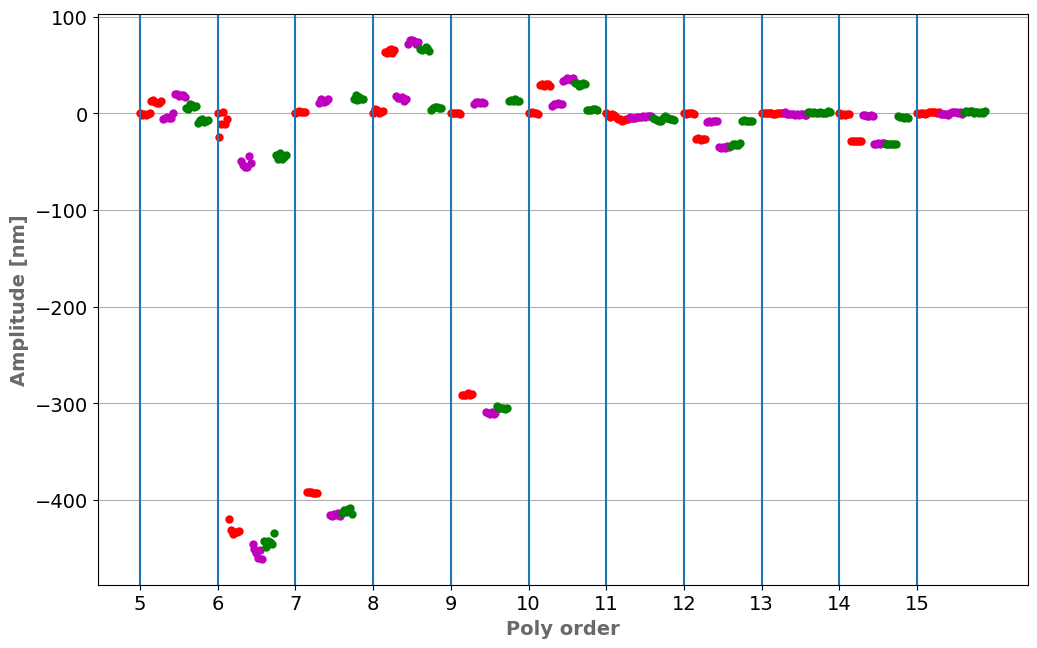

In [19]:
sequence_ref = 237
plot_allpolys(
    phmap,
    sequence_ids=sequence_ids,
    sequence_ref=sequence_ref,
    NZernike=NZernike,
    colors="rrrrrrrrrrrrmmmmmmmmmmmmgggggggggggg",
)

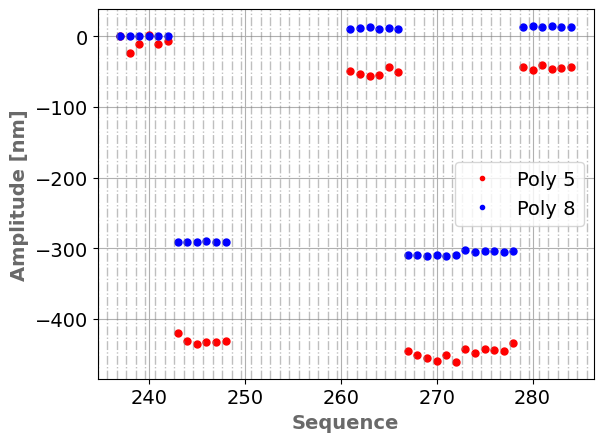

In [27]:
plot_polys(
    phmap,
    sequence_ids=sequence_ids,
    sequence_ref=sequence_ref,
    poly_order=[5, 8],
    colors="rb",
)